# Image Segmentation
An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.. Thus, the task of image segmentation is to train a neural network to output a pixel-wise mask of the image. This helps in understanding the image at a much lower level, i.e., the pixel level.In image segmetation each pixel is given a label.

Before diving into code, first we will need to import all the required libraries

# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Preparation

Let's unzip all the files

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/MLDL Dataset/train (1).zip') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/MLDL Dataset/train')

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/MLDL Dataset/train_masks.zip') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/MLDL Dataset/train_masks')

In [4]:
print("Train set:  ", len(os.listdir("/content/drive/MyDrive/MLDL Dataset/train/train")))
print("Train masks:", len(os.listdir("/content/drive/MyDrive/MLDL Dataset/train_masks/train_masks")))

Train set:   5088
Train masks: 5088


In [5]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MLDL Dataset/train/train'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
cf65b1c5e147_09,/content/drive/MyDrive/MLDL Dataset/train/trai...
cf65b1c5e147_10,/content/drive/MyDrive/MLDL Dataset/train/trai...
cf65b1c5e147_11,/content/drive/MyDrive/MLDL Dataset/train/trai...
cf65b1c5e147_12,/content/drive/MyDrive/MLDL Dataset/train/trai...
cf65b1c5e147_13,/content/drive/MyDrive/MLDL Dataset/train/trai...
...,...
0789bed99cb8_04,/content/drive/MyDrive/MLDL Dataset/train/trai...
0789bed99cb8_05,/content/drive/MyDrive/MLDL Dataset/train/trai...
0789bed99cb8_06,/content/drive/MyDrive/MLDL Dataset/train/trai...


In [6]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MLDL Dataset/train_masks/train_masks'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mask_path.append(path)
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id')
mask_df

,mask_path
id,
cf65b1c5e147_09,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_10,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_11,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_12,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_13,/content/drive/MyDrive/MLDL Dataset/train_mask...
...,...
0789bed99cb8_04,/content/drive/MyDrive/MLDL Dataset/train_mask...
0789bed99cb8_05,/content/drive/MyDrive/MLDL Dataset/train_mask...
0789bed99cb8_06,/content/drive/MyDrive/MLDL Dataset/train_mask...


In [7]:
df["mask_path"] = mask_df["mask_path"]
df

,car_path,mask_path
id,,
cf65b1c5e147_09,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_10,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_11,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_12,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
cf65b1c5e147_13,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
...,...,...
0789bed99cb8_04,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
0789bed99cb8_05,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...
0789bed99cb8_06,/content/drive/MyDrive/MLDL Dataset/train/trai...,/content/drive/MyDrive/MLDL Dataset/train_mask...


Now we will perform a simple augmentation of flipping an image and then normalize the image pixel in between 0 and 1

In [8]:
img_size = [256,256]

def data_augmentation(car_img, mask_img):

    if tf.random.uniform(()) > 0.5:
        car_img = tf.image.flip_left_right(car_img)
        mask_img = tf.image.flip_left_right(mask_img)

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

Now we will split the dataset into train and test

In [9]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [10]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 32
BUFFER_SIZE = 1000

In [11]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)

Let's look the image and it's corresponding mask

In [12]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

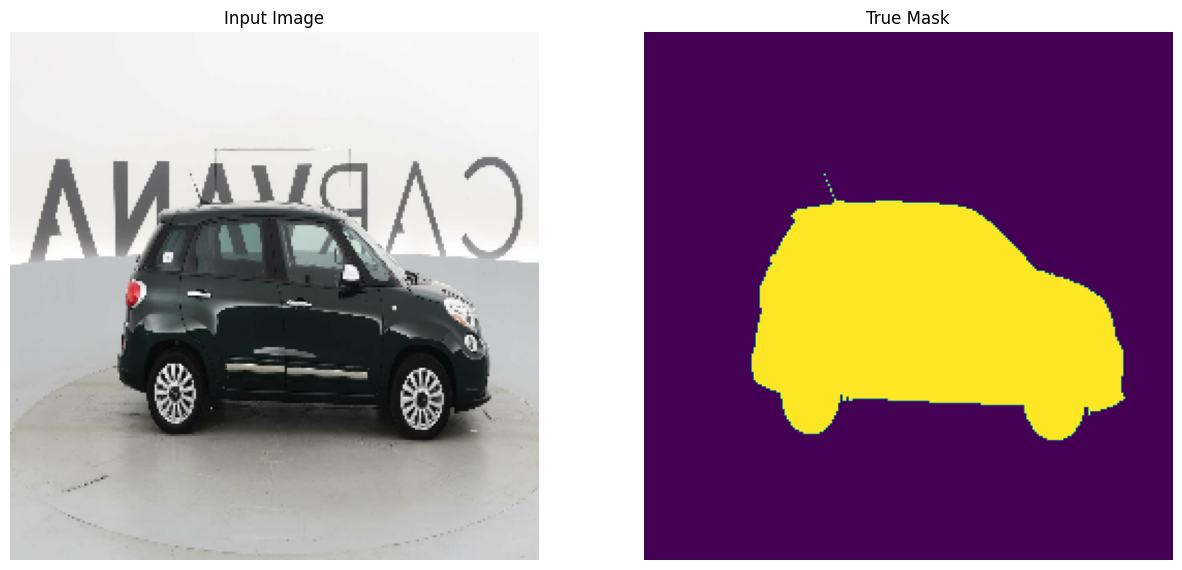

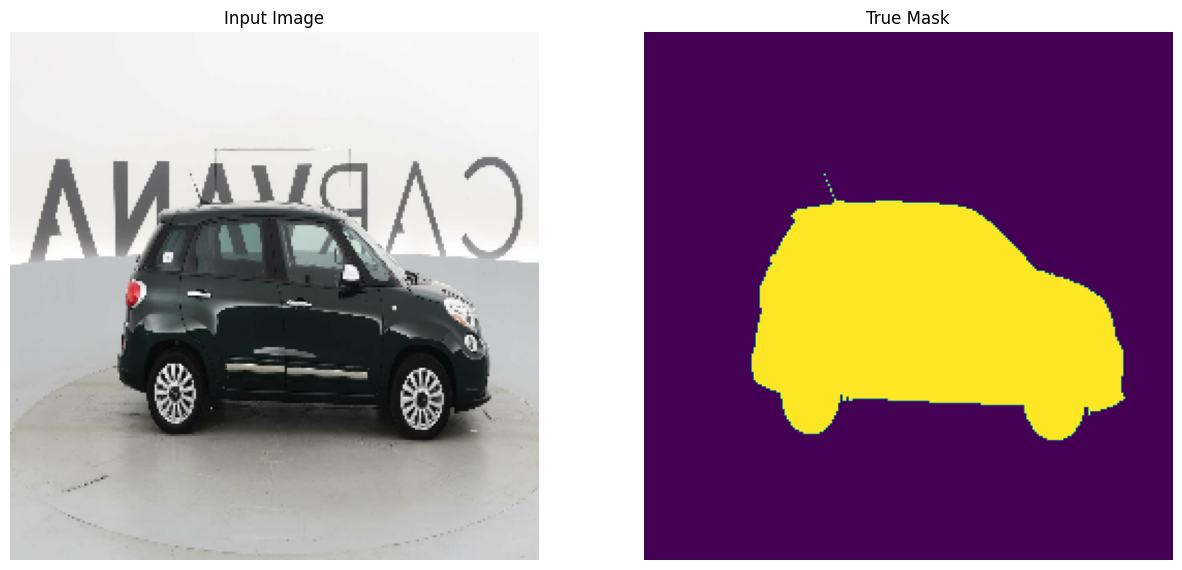

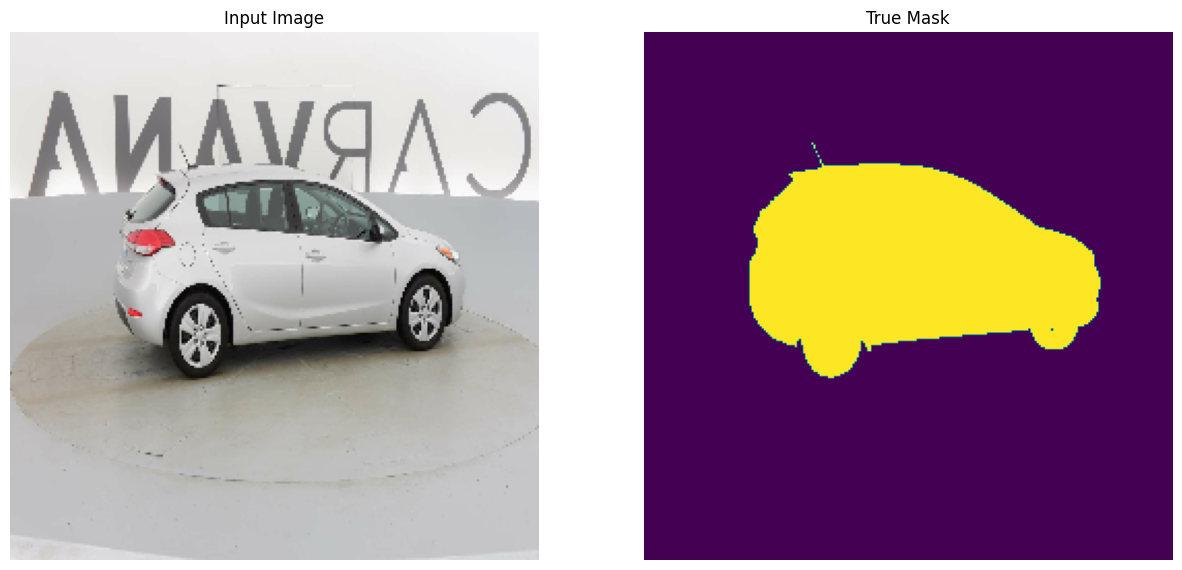

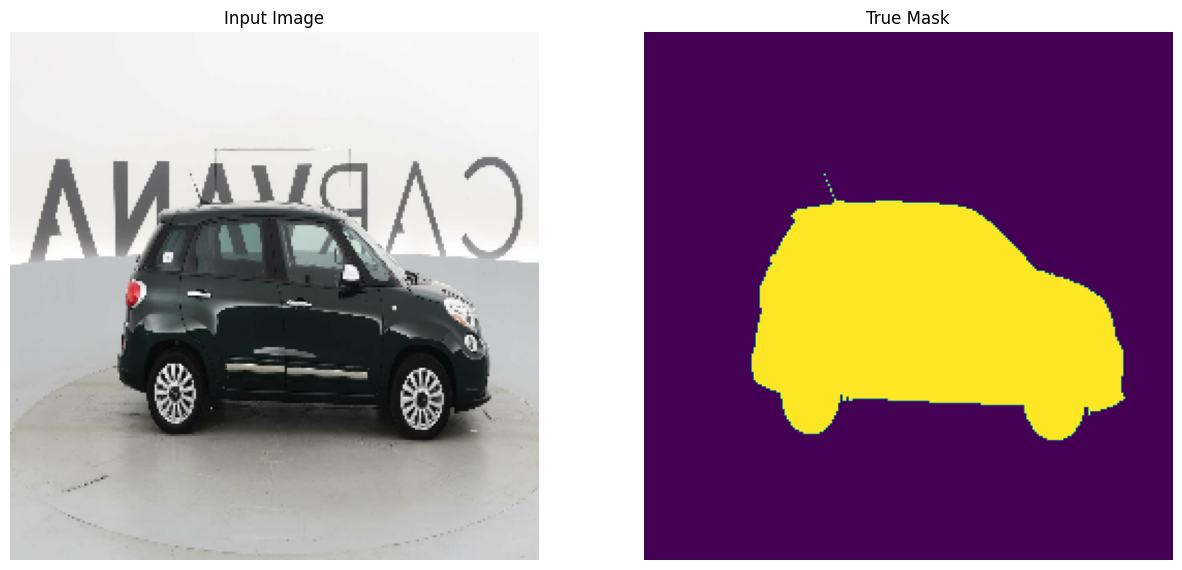

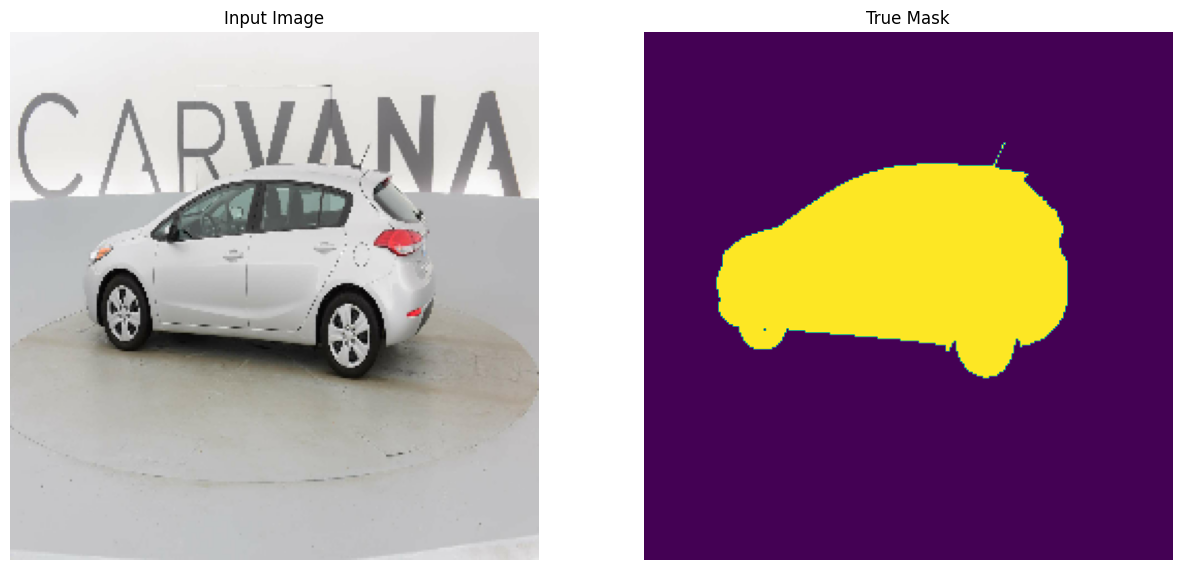

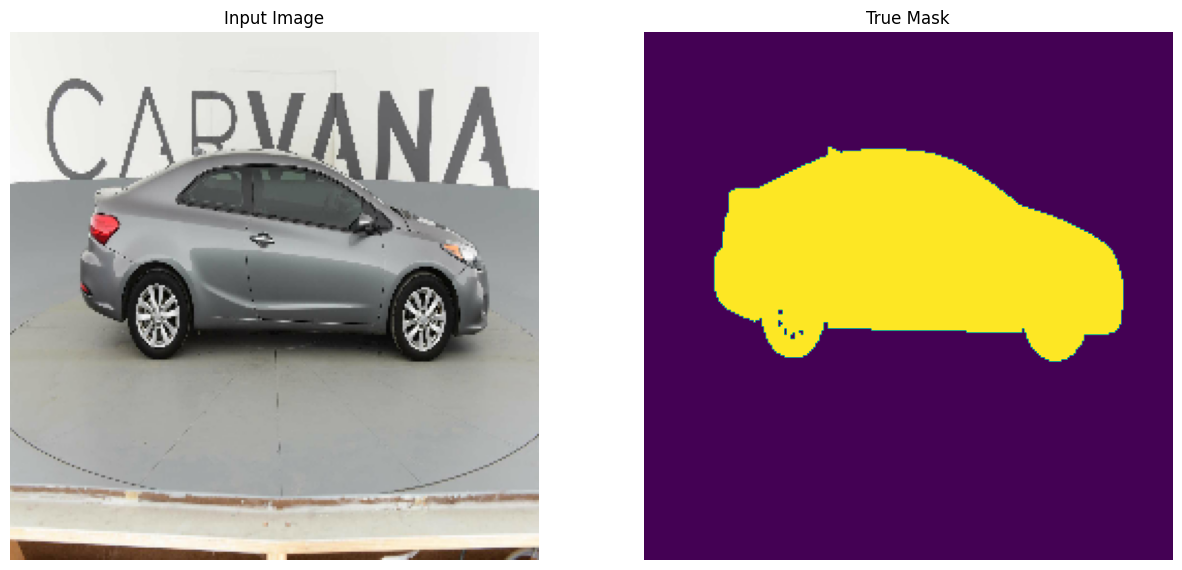

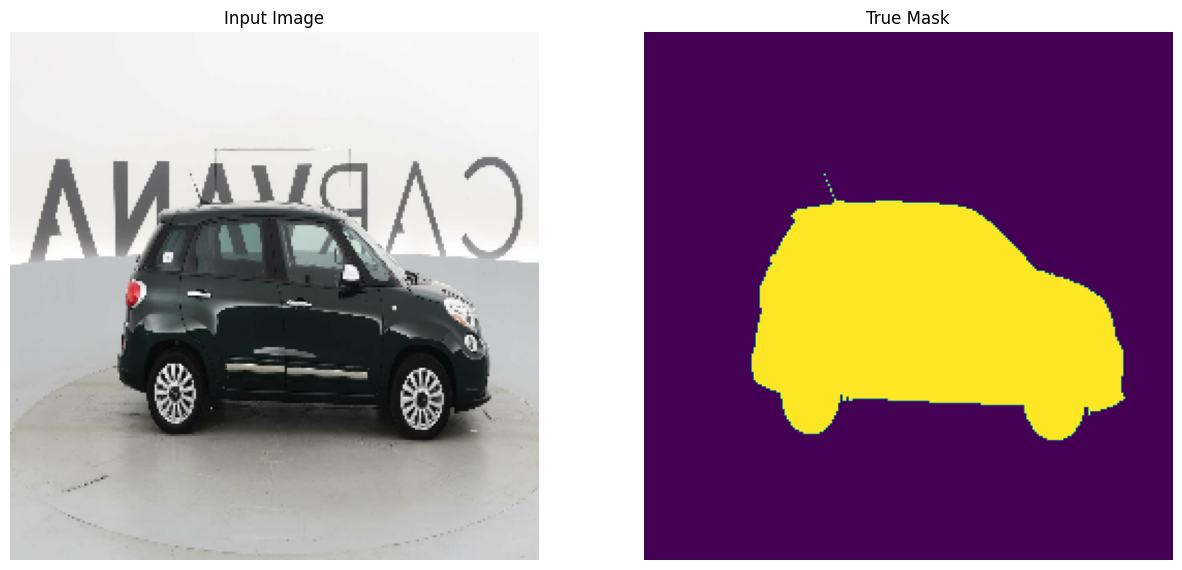

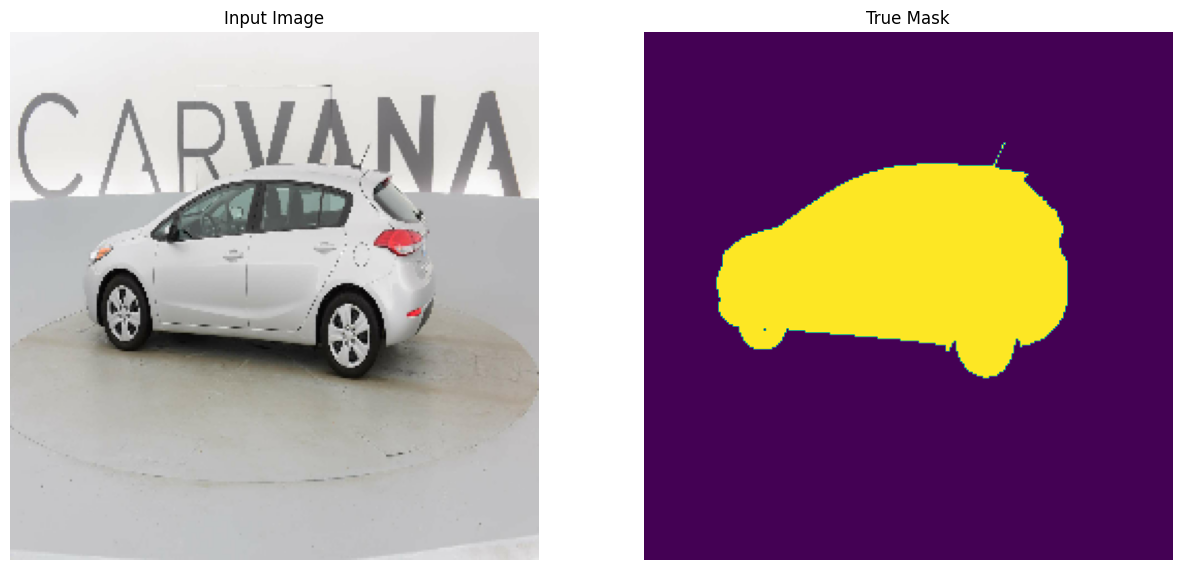

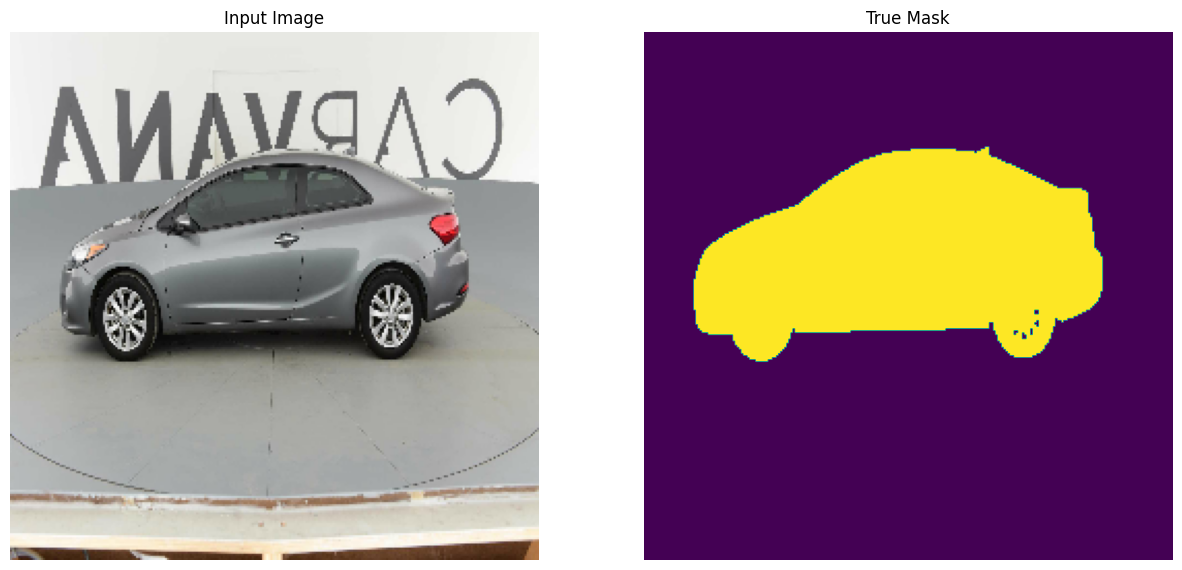

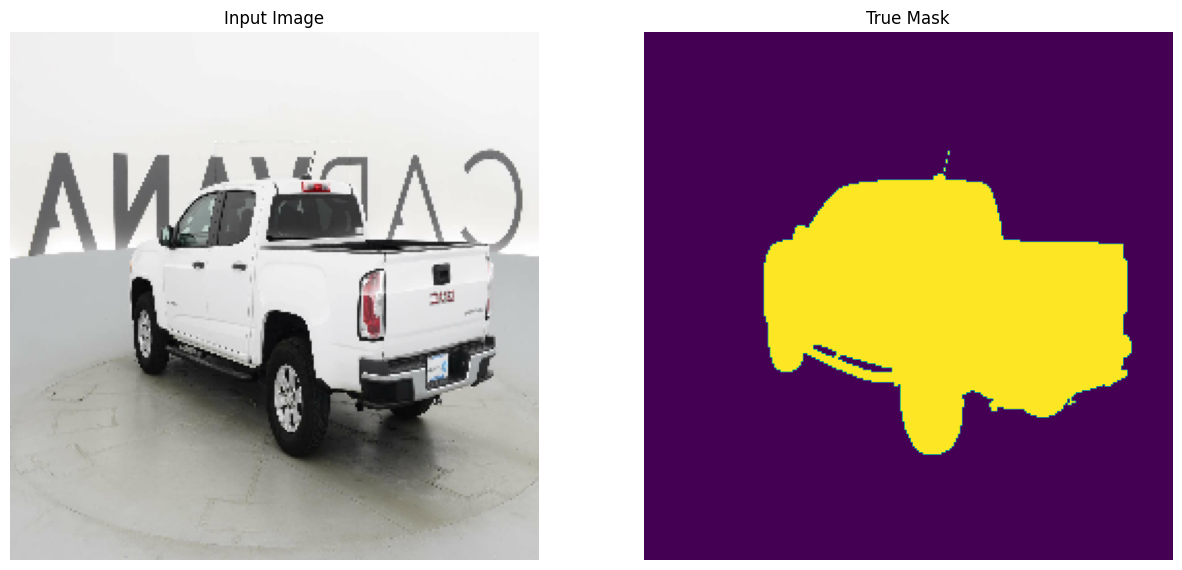

In [13]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

# Model

We are going to use U-Net model. A U-Net consists of an encoder (downsampler) and decoder (upsampler). In-order to learn robust features, and reduce the number of trainable parameters, a pretrained model can be used as the encoder.The encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in tf.keras.applications. 

In [14]:

base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [15]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [16]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# Train the Model

Now let's compile the model and see the model architecture

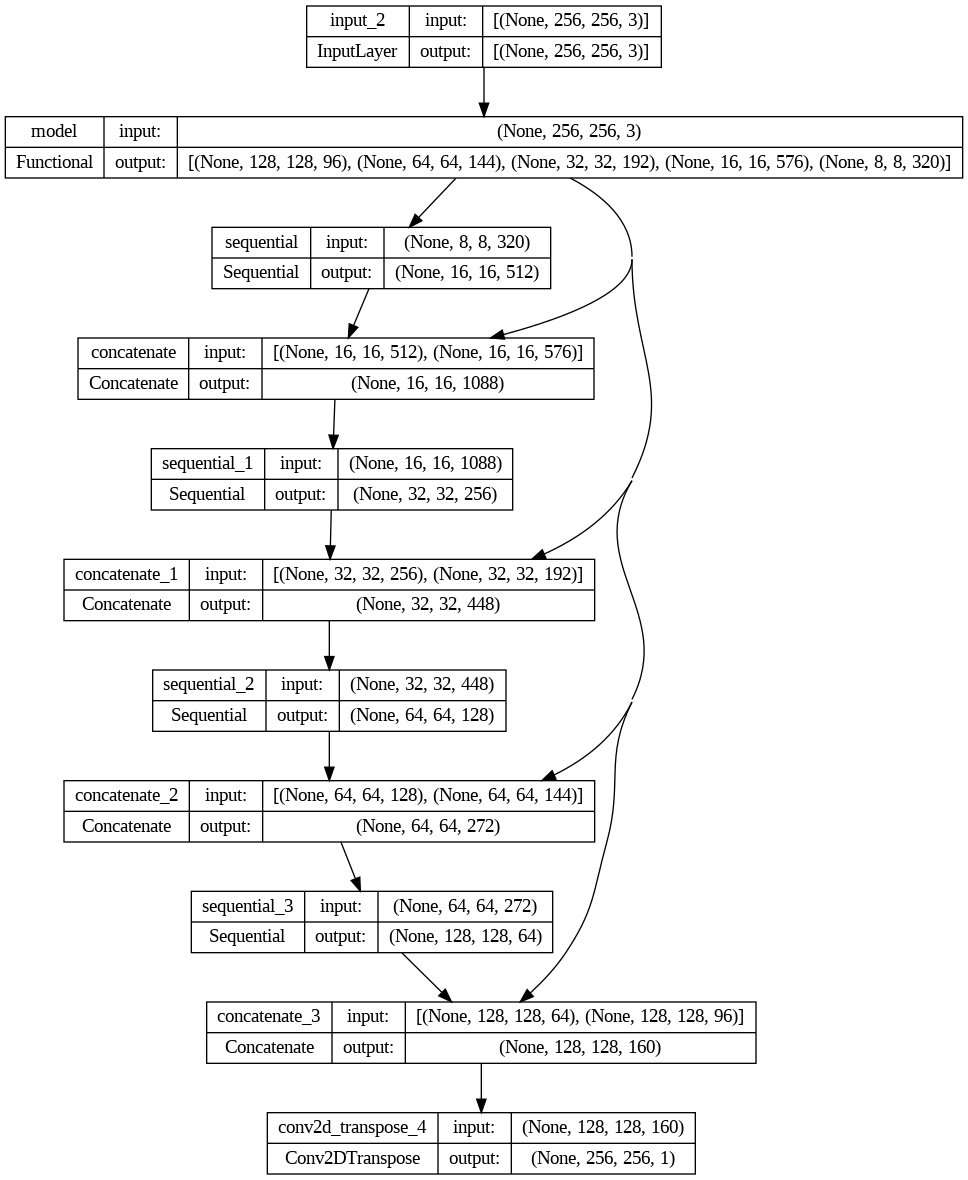

In [17]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

Let's try out the model to see what it predicts before training.

1/1 [==============================] - 9s 9s/step


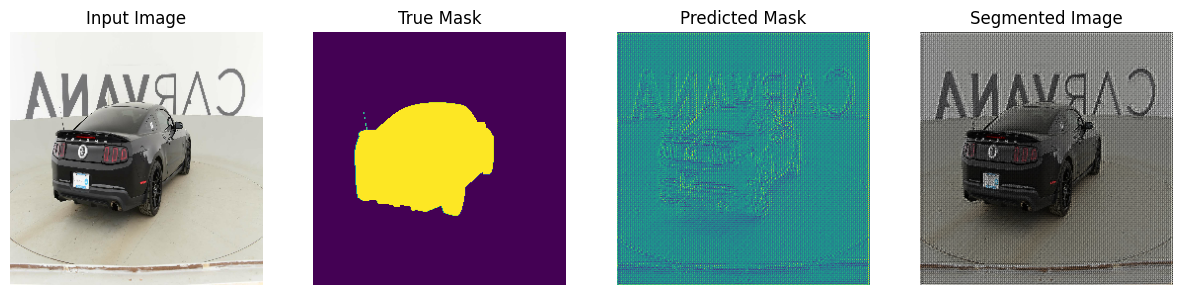

In [18]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask','Segmented Image']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask,pred_mask*sample_image])
    
show_predictions(sample_image, sample_mask)

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 128, 128, 9  1841984     ['input_2[0][0]']                
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                         

Let's observe how the model improves while it is training. To accomplish this task, a callback function is defined below.

Epoch 1/15
119/119 [==============================] - 461s 4s/step - loss: 0.1050 - dice_coef: 0.8950 - binary_accuracy: 0.9623 - val_loss: 0.0338 - val_dice_coef: 0.9662 - val_binary_accuracy: 0.9882
Epoch 2/15
1/1 [==============================] - 0s 23ms/step


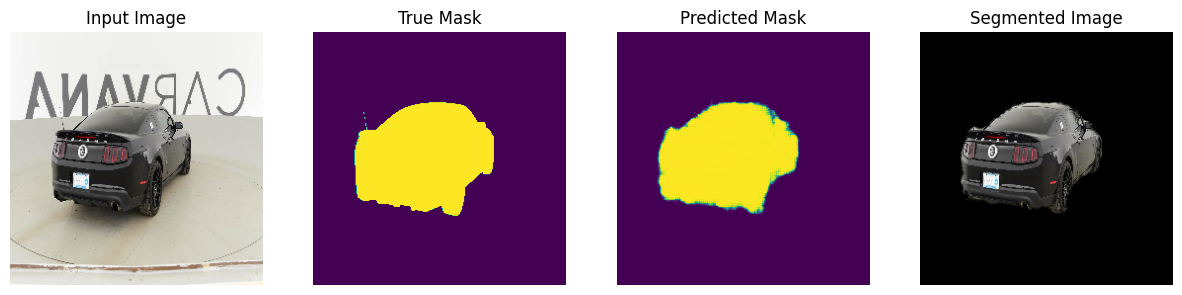

Epoch 3/15
119/119 [==============================] - 38s 320ms/step - loss: 0.0243 - dice_coef: 0.9757 - binary_accuracy: 0.9915 - val_loss: 0.0267 - val_dice_coef: 0.9733 - val_binary_accuracy: 0.9907
Epoch 4/15
119/119 [==============================] - 38s 317ms/step - loss: 0.0222 - dice_coef: 0.9778 - binary_accuracy: 0.9920 - val_loss: 0.0269 - val_dice_coef: 0.9731 - val_binary_accuracy: 0.9903
Epoch 5/15
1/1 [==============================] - 0s 22ms/step


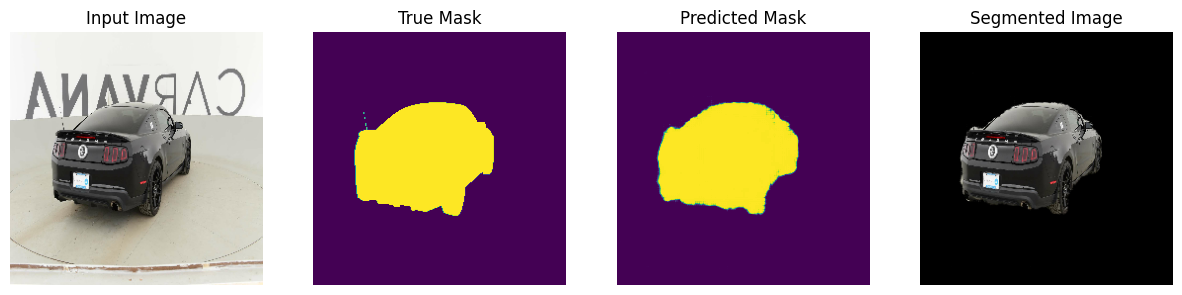

Epoch 6/15
119/119 [==============================] - 38s 318ms/step - loss: 0.0201 - dice_coef: 0.9799 - binary_accuracy: 0.9924 - val_loss: 0.0221 - val_dice_coef: 0.9779 - val_binary_accuracy: 0.9916
Epoch 7/15
119/119 [==============================] - 39s 326ms/step - loss: 0.0194 - dice_coef: 0.9806 - binary_accuracy: 0.9926 - val_loss: 0.0200 - val_dice_coef: 0.9800 - val_binary_accuracy: 0.9923
Epoch 8/15
1/1 [==============================] - 0s 23ms/step


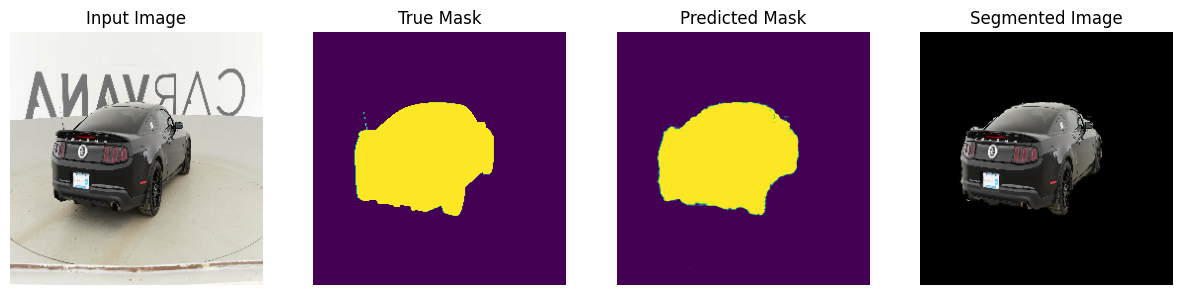

Epoch 9/15
119/119 [==============================] - 38s 317ms/step - loss: 0.0186 - dice_coef: 0.9814 - binary_accuracy: 0.9928 - val_loss: 0.0195 - val_dice_coef: 0.9805 - val_binary_accuracy: 0.9924
Epoch 10/15
119/119 [==============================] - 38s 318ms/step - loss: 0.0182 - dice_coef: 0.9818 - binary_accuracy: 0.9929 - val_loss: 0.0193 - val_dice_coef: 0.9807 - val_binary_accuracy: 0.9924
Epoch 11/15
1/1 [==============================] - 0s 24ms/step


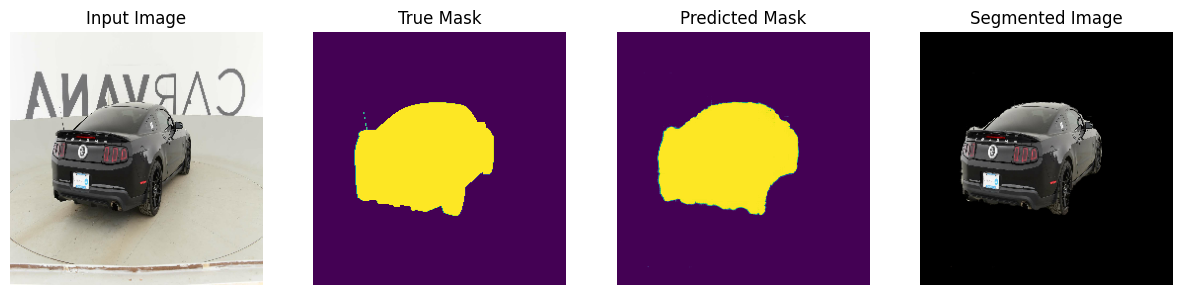

Epoch 12/15
119/119 [==============================] - 38s 319ms/step - loss: 0.0177 - dice_coef: 0.9823 - binary_accuracy: 0.9931 - val_loss: 0.0194 - val_dice_coef: 0.9806 - val_binary_accuracy: 0.9923
Epoch 13/15
119/119 [==============================] - 38s 318ms/step - loss: 0.0176 - dice_coef: 0.9824 - binary_accuracy: 0.9930 - val_loss: 0.0188 - val_dice_coef: 0.9812 - val_binary_accuracy: 0.9925
Epoch 14/15
1/1 [==============================] - 0s 21ms/step


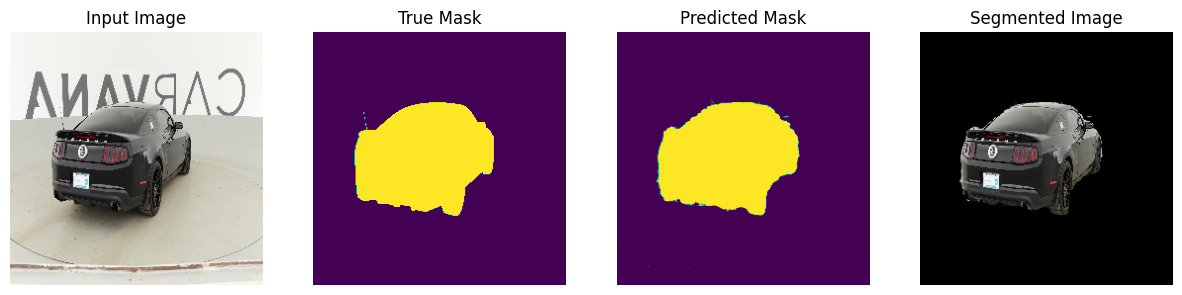

Epoch 15/15
119/119 [==============================] - 38s 319ms/step - loss: 0.0171 - dice_coef: 0.9828 - binary_accuracy: 0.9931 - val_loss: 0.0201 - val_dice_coef: 0.9799 - val_binary_accuracy: 0.9919


In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])